In [3]:
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignored keys in config.json
ignored_config_keys = ['type', 'train_indices', 'test_indices', 'test_size', 'epochs', 'early_stop_patience',
                       'output_dir']

# Root directory
root_dir = "Results"

# Get all subdirectories
experiment_dirs = glob.glob(f"{root_dir}/*/*/")

# Initialize an empty list to hold all experiment data
experiments_data = []

# Loop over each subdirectory
for exp_dir in experiment_dirs:
    # Config file path
    config_file = f"{exp_dir}config.json"

    # If config file doesn't exist, continue to next directory
    if not glob.glob(config_file):
        continue

    # Load config data
    with open(config_file, 'r') as f:
        config_data = json.load(f)

    # Result file patterns
    result_file = f"{exp_dir}result.json"

    if not glob.glob(result_file):
        continue

    # Load result data
    with open(result_file, 'r') as f:
        result_data = json.load(f)

    # Merge config data and result data
    experiment_data = {**config_data, **result_data}

    # Add folder information
    experiment_data["folder"] = '/'.join(exp_dir.split('/')[1:])

    # Append to list
    experiments_data.append(experiment_data)

# Convert list of dictionaries to pandas DataFrame
df = pd.DataFrame(experiments_data)

df

,ex_name,approach,seed,loss_function,epochs,batch_size,learning_rate,neurons,lambda,steepness_loss,...,steepness,n_train_samples,train_samples,lookback,test_samples,train_rmse_mean,train_rmse_std,test_rmse_mean,test_rmse_std,folder
0,Test,Data_Baseline,42,mean_squared_error,200,128,0.001,32,0.99966,6.388,...,6.388,2,"[20, 9]",450,"[4, 22]",135.856,59.583,289.315,31.447,Data_Baseline/type-experiment_date-2023-07-30_...
1,Test,Data_Baseline,2,mean_squared_error,200,128,0.001,32,0.99966,6.388,...,6.388,5,"[23, 9, 21, 20, 24]",450,"[4, 22]",102.643,22.234,138.368,11.767,Data_Baseline/type-experiment_date-2023-07-31_...
2,Test,Data_Baseline,4,mean_squared_error,200,128,0.001,32,0.99966,6.388,...,6.388,6,"[23, 24, 21, 1, 9, 20]",450,"[4, 22]",99.514,27.150,159.060,7.685,Data_Baseline/type-experiment_date-2023-07-31_...
3,Test,Data_Baseline,42,mean_squared_error,200,128,0.001,32,0.99966,6.388,...,6.388,6,"[20, 9, 23, 1, 21, 24]",450,"[4, 22]",149.768,47.017,118.166,9.538,Data_Baseline/type-experiment_date-2023-07-30_...
4,Test,Data_Baseline,42,mean_squared_error,200,128,0.001,32,0.99966,6.388,...,6.388,5,"[24, 20, 9, 21, 1]",450,"[4, 22]",164.040,63.155,180.649,10.473,Data_Baseline/type-experiment_date-2023-07-29_...
5,Test,Data_Baseline,42,mean_squared_error,200,128,0.001,32,0.99966,6.388,...,6.388,4,"[20, 9, 23, 1]",450,"[4, 22]",228.189,14.091,279.121,22.944,Data_Baseline/type-experiment_date-2023-07-30_...
6,Test,Data_Baseline,3,mean_squared_error,200,128,0.001,32,0.99966,6.388,...,6.388,5,"[21, 24, 23, 9, 1]",450,"[4, 22]",119.016,11.915,167.215,6.286,Data_Baseline/type-experiment_date-2023-07-31_...
7,Test,Data_Baseline,42,mean_squared_error,200,128,0.001,32,0.99966,6.388,...,6.388,2,"[24, 20]",450,"[4, 22]",265.314,88.983,326.026,71.577,Data_Baseline/type-experiment_date-2023-07-29_...
8,Test,Data_Baseline,4,mean_squared_error,200,128,0.001,32,0.99966,6.388,...,6.388,4,"[23, 24, 21, 1]",450,"[4, 22]",94.464,17.860,161.804,5.467,Data_Baseline/type-experiment_date-2023-07-31_...
9,Test,Data_Baseline,42,mean_squared_error,200,128,0.001,32,0.99966,6.388,...,6.388,1,[20],450,"[4, 22]",320.295,0.000,378.483,89.691,Data_Baseline/type-experiment_date-2023-07-30_...


In [5]:
df = df[['loss_function', 'n_train_samples', 'test_rmse_mean', 'folder']]
df

,loss_function,n_train_samples,test_rmse_mean,folder
0,mean_squared_error,2,289.315,Data_Baseline/type-experiment_date-2023-07-30_...
1,mean_squared_error,5,138.368,Data_Baseline/type-experiment_date-2023-07-31_...
2,mean_squared_error,6,159.060,Data_Baseline/type-experiment_date-2023-07-31_...
3,mean_squared_error,6,118.166,Data_Baseline/type-experiment_date-2023-07-30_...
4,mean_squared_error,5,180.649,Data_Baseline/type-experiment_date-2023-07-29_...
5,mean_squared_error,4,279.121,Data_Baseline/type-experiment_date-2023-07-30_...
6,mean_squared_error,5,167.215,Data_Baseline/type-experiment_date-2023-07-31_...
7,mean_squared_error,2,326.026,Data_Baseline/type-experiment_date-2023-07-29_...
8,mean_squared_error,4,161.804,Data_Baseline/type-experiment_date-2023-07-31_...
9,mean_squared_error,1,378.483,Data_Baseline/type-experiment_date-2023-07-30_...


In [6]:
df.groupby(['loss_function', 'n_train_samples']).agg({'test_rmse_mean': ['mean', 'std', 'count']})

test_rmse_mean                 
                                             mean        std count
loss_function      n_train_samples                                
mean_squared_error 1                     333.2970  31.489099     5
                   2                     260.3426  70.269949     5
                   3                     255.5666  87.487201     5
                   4                     213.2802  42.538926     5
                   5                     184.3618  35.549262     5
                   6                     195.2560  68.681464     5

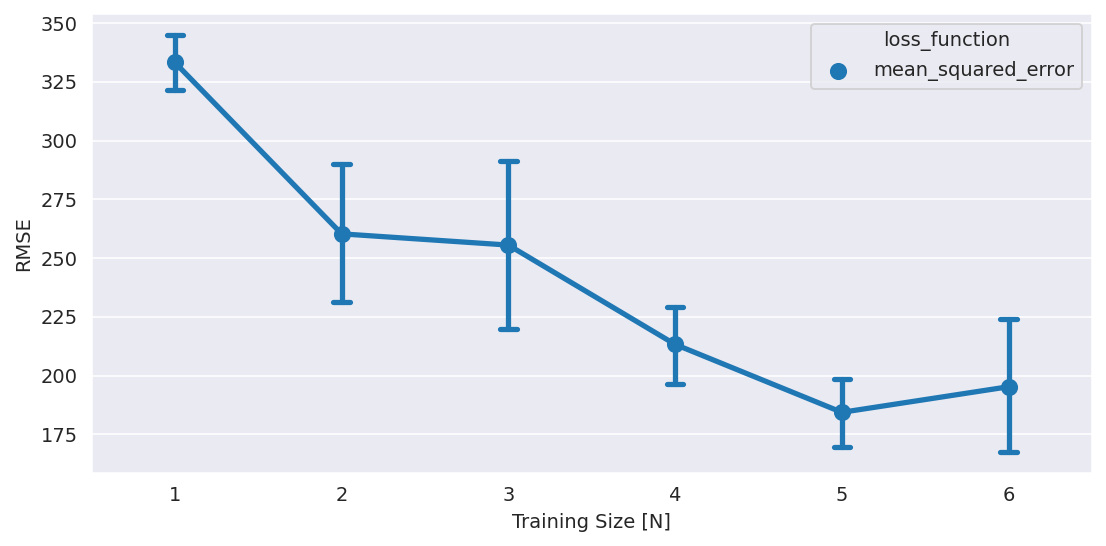

In [7]:
fig, axes = plt.subplots(nrows=1, figsize=(8, 4), dpi=140)
sns.pointplot(
    ax=axes,
    data=df,
    x="n_train_samples",
    y="test_rmse_mean",
    hue="loss_function",
    ci=68,
    marker="o",
    capsize=0.1,
    alpha=0.7,
).set(xlabel="Training Size [N]", ylabel="RMSE")
fig.tight_layout()
plt.show()